In [323]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importing dataset
dataset = pd.read_csv('poem-dataset.csv')

In [324]:
# Number of rows and columns
dataset.shape

(513, 5)

In [325]:
# Word count
count = 0
for word in dataset.content:
    word = word.split()
    count += len(word)
print(count)

91490


In [326]:
# Row with missing value
row_null = dataset[dataset.isnull().any(axis=1)]
row_null

,author,content,poem name,age,type
5,GEOFFREY CHAUCER,"Now welcome, somer, with thy sonne softe,\nTha...",The Parlement of Fowls \n,NaN,Relationships
11,TARFIA FAIZULLAH,My sister died. He raped me. They beat me. I f...,100 Bells \n,NaN,Relationships
59,Amanda Jernigan,They billow from a hillside in Cha’am. \nToget...,Bats,NaN,Relationships
60,Rita Ann Higgins,"For Christ’s sake,\nlearn to type\nand have so...",Be Someone \n,NaN,Relationships
61,Eloise Klein Healy,The cliff above where we stand is crumbling\na...,The Beach at Sunset,NaN,Relationships
62,Geoffrey Chaucer,"Fle fro the pres, and dwelle with sothefastnes...",Truth,NaN,Relationships
63,tephanie Burt,I can remember when I wanted X\nmore than anyt...,"A Covered Bridge in Littleton, New Hampshire",NaN,Relationships
64,John Wilmot Earl of Rochester,"I cannot change, as others do, \nThough you un...",Constancy,NaN,Relationships
65,Hannah Lowe,"I carry you, a fleck, to Jamaica At the Chines...",Genealogy,NaN,Relationships
116,Tsering Wangmo Dhompa,A hundred and one butter lamps are offered to ...,Bardo,NaN,Relationships


In [327]:
# We need only the content column. 
# Since the content column is not null in any of the rows, we leave the above "row_null" as it is.

In [328]:
dataset.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [329]:
# Lowercasing
dataset['content'] = dataset["content"].str.lower()
dataset['content'].head()

0    let the bird of loudest lay\r\non the sole ara...
1    sir charles into my chamber coming in,\r\nwhen...
2    our vice runs beyond all that old men saw,\r\n...
3    lo i the man, whose muse whilome did maske,\r\...
4    long have i longd to see my love againe,\r\nst...
Name: content, dtype: object

In [330]:
# Removing all punctuation
dataset['content'] = dataset['content'].str.replace('[^\w\s]','')
dataset['content'].head()

0    let the bird of loudest lay\r\non the sole ara...
1    sir charles into my chamber coming in\r\nwhen ...
2    our vice runs beyond all that old men saw\r\na...
3    lo i the man whose muse whilome did maske\r\na...
4    long have i longd to see my love againe\r\nsti...
Name: content, dtype: object

In [331]:
# Removing the stopwords

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

dataset['content'] = dataset['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

count = 0
for word in dataset.content:
    word = word.split()
    count += len(word)
print(count)


50600


In [332]:
# Removing stopword for old english manually
old_english_words = ['doth','dost','hast','hath','hence','hither','nigh','oft','thither','thee','thou','thine','thy',
                    'wast','whence','wherefore','whereto','withal','ye','yon','yonder','\'ere']

stop.extend(old_english_words)
stop



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [333]:
dataset['content'] = dataset['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataset.content.head()

count = 0
for word in dataset.content:
    word = word.split()
    count += len(word)
print(count)


48702


In [334]:
# The number of words after preprocessing is less than 50,000

In [335]:
# Calculating the frequency of words here.
freq = pd.Series(' '.join(dataset['content']).split()).value_counts()[:50]
freq


love      558
like      265
one       241
shall     217
may       216
yet       205
let       200
eyes      185
see       164
still     164
fair      158
heart     147
us        146
day       143
long      142
upon      141
make      136
sweet     136
whose     133
come      127
would     125
light     125
never     121
though    118
well      115
time      114
world     112
must      111
made      109
night     107
go        107
beauty    106
loves     105
great     103
old       103
know      100
men        97
take       96
till       95
thus       94
sing       94
true       93
might      93
could      93
since      92
man        92
every      88
face       87
ever       87
mine       86
dtype: int64

In [336]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
author       513 non-null object
content      513 non-null object
poem name    511 non-null object
age          503 non-null object
type         513 non-null object
dtypes: object(5)
memory usage: 20.1+ KB


In [337]:
# Finding the genres of poems in the dataset
genres = dataset.type.unique()
genres

array(['Mythology & Folklore', 'Relationships', 'Nature', 'Love'],
      dtype=object)

In [338]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 11000)
X = cv.fit_transform(dataset.content).toarray()
y = dataset.iloc[:, -1:].values

In [339]:
X.shape

(513, 11000)

In [340]:
# Splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


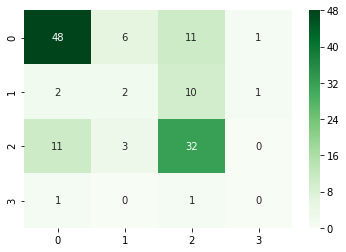

In [341]:
# Applying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "gini")
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens')


In [342]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.6356589147286822


In [343]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

                Love       0.77      0.73      0.75        66
Mythology & Folklore       0.18      0.13      0.15        15
              Nature       0.59      0.70      0.64        46
       Relationships       0.00      0.00      0.00         2

           micro avg       0.64      0.64      0.64       129
           macro avg       0.39      0.39      0.39       129
        weighted avg       0.63      0.64      0.63       129



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


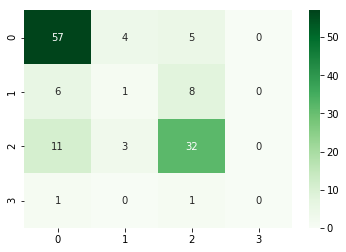

In [344]:
# Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = "gini")
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens')

In [345]:
# Calculating accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.6976744186046512


In [346]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

                Love       0.76      0.86      0.81        66
Mythology & Folklore       0.12      0.07      0.09        15
              Nature       0.70      0.70      0.70        46
       Relationships       0.00      0.00      0.00         2

           micro avg       0.70      0.70      0.70       129
           macro avg       0.40      0.41      0.40       129
        weighted avg       0.65      0.70      0.67       129



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
